# Python para Ciência de Dados
## Análise do Desenvolvimento Humano e Econômico Global com Base no Dataset Gapminder

Técnicas utilizadas
- Separação de dados em níveis de qualidade de dados (bronze, prata, ouro): Organizando dados já processados
- Uso de backward-fill e interpolação linear: Processamento de dados ausentes


Datasets adicionais e Fontes de Dados
- Códigos ISO:
- Mortalidade Infantil:
- Emissões de CO2
- Consumo de proteína:
- Alfabetização:


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import os
from io import StringIO
from enum import Enum

df = pd.read_csv('dados/bronze/gapminder_full.csv', sep=',')

### Descrições Iniciais do Dataset - Sem limpeza

In [2]:
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1736 non-null   object 
 1   year       1736 non-null   int64  
 2   pop        1736 non-null   float64
 3   continent  1736 non-null   object 
 4   lifeExp    1736 non-null   float64
 5   gdpPercap  1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 81.5+ KB


In [4]:
df.describe()

,year,pop,lifeExp,gdpPercap
count,1736.000000,1.736000e+03,1736.000000,1736.000000
mean,1979.669931,3.156800e+07,59.511979,7240.155986
std,17.296364,1.172888e+08,12.956028,9839.873695
min,1952.000000,6.001100e+04,23.599000,241.165876
25%,1967.000000,2.818694e+06,48.245000,1202.060309
50%,1982.000000,7.150606e+06,60.808000,3534.772106
75%,1997.000000,1.977102e+07,70.945000,9380.254270
max,2007.000000,1.318683e+09,82.603000,113523.132900


## Análise e limpeza dos datasets

In [5]:
size_country = df.groupby("country").size().sort_values(ascending=False)
size_country

country
France                19
Bolivia               17
Guinea                17
Ecuador               15
China                 15
                      ..
Vietnam               12
West Bank and Gaza    12
Yemen Rep.            12
Zambia                12
Zimbabwe              12
Length: 142, dtype: int64

Temos valores duplicados em nosso dataset os paises deviam ter apenas 12 entradas, precisamos limpar os valores duplicados

In [6]:
df = df.drop_duplicates() # Estamos removendo duplicatas completas
# Verificando se há algum registro duplicado restante, usando subset de pais e ano
duplicados_restantes = df[df.duplicated(subset=['country', 'year'], keep= False)].copy()
duplicados_restantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    0 non-null      object 
 1   year       0 non-null      int64  
 2   pop        0 non-null      float64
 3   continent  0 non-null      object 
 4   lifeExp    0 non-null      float64
 5   gdpPercap  0 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 0.0+ bytes


Foram removidos 32 registros duplicados (duplicatas completas)... Não há mais nenhum registro duplicado restante

Agora queremos verificar se os registros por ano estão distribuídos uniformente

In [7]:
df_analise_agrupamento_anoxpais = df.sort_values(["country", "year"])
df_analise_agrupamento_anoxpais["diff_ano"] = df.groupby("country")["year"].diff().fillna(0).astype(int)
df_analise_agrupamento_anoxpais

,country,year,pop,continent,lifeExp,gdpPercap,diff_ano
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,0
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,5
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,5
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,5
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,5
...,...,...,...,...,...,...,...
1731,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306,5
1732,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786,5
1733,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960,5
1734,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623,5


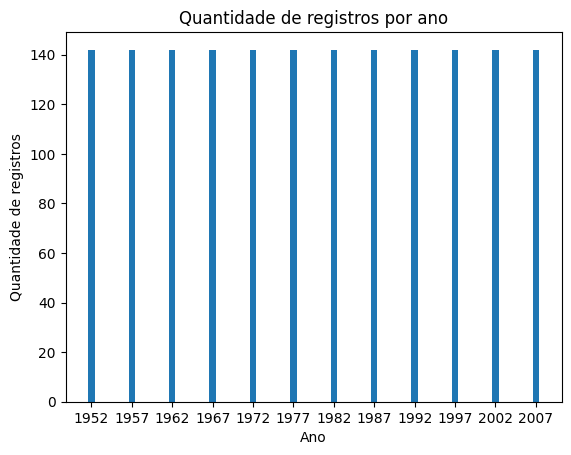

In [8]:
count_por_ano = df_analise_agrupamento_anoxpais.groupby("year").size().reset_index(name="total")
plt.figure()
plt.bar(count_por_ano["year"], count_por_ano["total"])
plt.xlabel("Ano")
plt.ylabel("Quantidade de registros")
plt.title("Quantidade de registros por ano")
plt.xticks(count_por_ano["year"])
plt.show()

Os registros estão distribuídos uniformemente com registros a cada 5 anos... 

Verificando existência de dados ausentes

In [9]:
df.isnull().sum()

country      0
year         0
pop          0
continent    0
lifeExp      0
gdpPercap    0
dtype: int64

Não há nenhum dado ausente em nosso data set - vamos salvar uma versão limpa dos dados

In [10]:
df.to_csv("dados/prata/gapminder_dataset_limpo.csv", sep='|', encoding='utf-8')

## Criando novas colunas - derivando dados

In [11]:
df["gdp_total"] = df["pop"] * df["gdpPercap"]
df["gdp_total_bn"] = df["gdp_total"] / 1_000_000_000
df["pop_mn"] = df["pop"] / 1_000_000
df

,country,year,pop,continent,lifeExp,gdpPercap,gdp_total,gdp_total_bn,pop_mn
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,6.567086e+09,6.567086,8.425333
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,7.585449e+09,7.585449,9.240934
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,8.758856e+09,8.758856,10.267083
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,9.648014e+09,9.648014,11.537966
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,9.678553e+09,9.678553,13.079460
...,...,...,...,...,...,...,...,...,...
1731,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306,6.508241e+09,6.508241,9.216418
1732,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786,7.422612e+09,7.422612,10.704340
1733,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960,9.037851e+09,9.037851,11.404948
1734,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623,8.015111e+09,8.015111,11.926563


## Obtendo dados de fontes externas

### Definição de funções

In [12]:
def load_csv_columns(url, path, columns):
    """
    Baixa um CSV a partir de uma URL, valida colunas, salva o arquivo completo
    e retorna apenas as colunas selecionadas.

    Parâmetros:
        url (str): Endereço do CSV na web.
        path (str): Caminho onde o CSV completo será salvo.
        columns (list): Lista de colunas que devem ser retornadas.

    Retorna:
        DataFrame contendo apenas as colunas solicitadas.
    """

    # -----------------------------
    # 1. Validação básica da URL
    # -----------------------------
    if not isinstance(url, str) or not url.startswith(("http://", "https://")):
        raise ValueError("A URL fornecida é inválida ou não começa com http/https.")

    # -----------------------------
    # 2. Tentativa de download
    # -----------------------------
    try:
        response = requests.get(url, timeout=10)  # timeout evita travamentos
        response.raise_for_status()  # lança erro se status != 200
    except requests.exceptions.Timeout:
        raise TimeoutError("A requisição excedeu o tempo limite.")
    except requests.exceptions.HTTPError as e:
        raise ConnectionError(f"Erro HTTP ao acessar a URL: {e}")
    except requests.exceptions.RequestException as e:
        raise ConnectionError(f"Erro ao tentar baixar o arquivo: {e}")

    # -----------------------------
    # 3. Leitura do CSV em memória
    # -----------------------------
    try:
        df = pd.read_csv(StringIO(response.text))
    except Exception as e:
        raise ValueError(f"Erro ao ler o CSV: {e}")

    # -----------------------------
    # 4. Validação das colunas
    # -----------------------------
    colunas_faltando = [c for c in columns if c not in df.columns]
    if colunas_faltando:
        raise KeyError(f"As seguintes colunas não existem no CSV: {colunas_faltando}")

    # -----------------------------
    # 5. Seleção das colunas desejadas
    # -----------------------------
    df_filtrado = df[columns].reset_index(drop=True)

    # -----------------------------
    # 6. Criar diretório se não existir
    # -----------------------------
    os.makedirs(os.path.dirname(path), exist_ok=True)

    # -----------------------------
    # 7. Salvar o CSV completo no disco
    # -----------------------------
    try:
        df.to_csv(path, sep=';', encoding='utf-8', index=False)
    except Exception as e:
        raise IOError(f"Erro ao salvar o arquivo no caminho especificado: {e}")

    # -----------------------------
    # 8. Retornar apenas as colunas filtradas
    # -----------------------------
    return df_filtrado

def preencher_dataframe_por_interpolacao_linear(df, coluna_valor=None):
    """
    Preenche anos faltantes e realiza interpolação linear sobre uma coluna numérica ou todas as colunas numéricas.

    Parâmetros:
        df (DataFrame): DataFrame contendo pelo menos 'year', 'country'.
        coluna_valor (str, optional): Nome da coluna numérica a ser interpolada. Se None, interpola todas as numéricas exceto 'year'.

    Retorna:
        DataFrame com anos completos (se aplicável), país preenchido e valores interpolados.
    """

    # -----------------------------
    # 1. Validação básica
    # -----------------------------
    colunas_necessarias = {"year", "country"}
    faltando = colunas_necessarias - set(df.columns)

    if faltando:
        raise KeyError(f"Colunas faltando no DataFrame: {faltando}")

    # -----------------------------
    # 2. Ordenar por ano
    # -----------------------------
    df = df.sort_values("year").reset_index(drop=True)

    if coluna_valor is not None:
        # Modo original: uma coluna específica
        colunas_necessarias.add(coluna_valor)
        faltando = colunas_necessarias - set(df.columns)
        if faltando:
            raise KeyError(f"Colunas faltando no DataFrame: {faltando}")

        # -----------------------------
        # 3. Criar intervalo completo de anos
        # -----------------------------
        anos_completos = pd.DataFrame({
            "year": range(df["year"].min(), df["year"].max() + 1)
        })

        # -----------------------------
        # 4. Fazer merge para incluir anos faltantes
        # -----------------------------
        df = anos_completos.merge(df, on="year", how="left")

        # -----------------------------
        # 5. Preencher país (forward fill + backward fill)
        # -----------------------------
        df["country"] = df["country"].ffill().bfill()

        # -----------------------------
        # 6. Interpolação linear da coluna numérica
        # -----------------------------
        df[coluna_valor] = (
            df[coluna_valor]
            .interpolate(method="linear")  # preenche valores intermediários
            .bfill()                       # garante que o início não fique nulo
            .ffill()                       # garante que o fim não fique nulo
        )
    else:
        # Modo novo: todas as colunas numéricas exceto 'year'
        import numpy as np
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        for col in numeric_cols:
            if col != "year":
                df[col] = (
                    df[col]
                    .interpolate(method="linear")
                    .bfill()
                    .ffill()
                )

    return df

### Código ISO dos Países (Chave Primária para outros datasets)

In [ ]:
iso_countries = load_csv_columns(
    "https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv", 
    "dados/bronze/contry_iso_codes.csv", 
    ["COUNTRY", "CODE"]
)
# Renomeando colunas para padrão gapminder
iso_countries = iso_countries.rename(columns={
    "COUNTRY": "country",
    "CODE": "code"
})

iso_countries

,country,code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND
...,...,...
217,Virgin Islands,VGB
218,West Bank,WBG
219,Yemen,YEM
220,Zambia,ZMB


### ETL de dados de mortalidade infantil

In [14]:
child_mortality = load_csv_columns(
    "https://raw.githubusercontent.com/owid/owid-datasets/6155d4ca1ea14ef30e753010a25521eeb416e8a2/datasets/Child%20mortality%20-%20Gapminder%20(2013)/Child%20mortality%20-%20Gapminder%20(2013).csv",
    "dados/bronze/child_mortality.csv",
    ["Entity", "Year", "Child mortality (Gapminder (2013))"]
)
# Renomeando colunas para padrão gapminder
child_mortality = child_mortality.rename(columns={
    "Entity" : "country",
    "Year" : "year",
    "Child mortality (Gapminder (2013))" : "child_mortality"
})

child_mortality.to_csv("dados/prata/child_mortality.csv", sep=';', encoding='utf-8', index=False)
display(child_mortality)

,country,year,child_mortality
0,Afghanistan,1800,468.58
1,Afghanistan,1801,468.58
2,Afghanistan,1802,468.58
3,Afghanistan,1803,468.58
4,Afghanistan,1804,468.58
...,...,...,...
33236,Zimbabwe,2009,96.90
33237,Zimbabwe,2010,96.00
33238,Zimbabwe,2011,94.00
33239,Zimbabwe,2012,88.50


### ETL de Share de Emissões de CO2

In [15]:
co2_share = load_csv_columns(
    "https://raw.githubusercontent.com/owid/owid-datasets/refs/heads/master/datasets/Cumulative%20CO2%20emissions%20share%20(OWID%20based%20on%20GCP%2C%202017)/Cumulative%20CO2%20emissions%20share%20(OWID%20based%20on%20GCP%2C%202017).csv",
    "dados/bronze/co2_emissions.csv",
    ["Entity", "Year", "Cumulative CO2 emissions share (OWID based on GCP, 2017)"]
)
# Renomeando colunas para padrão gapminder
co2_share = co2_share.rename(columns={
    "Entity" : "country",
    "Year" : "year",
    "Cumulative CO2 emissions share (OWID based on GCP, 2017)" : "co2_share"
})

co2_share.to_csv("dados/prata/co2_emissions.csv", sep=';', encoding='utf-8', index=False)
display(co2_share)

,country,year,co2_share
0,Afghanistan,1751,0.0000
1,Afghanistan,1752,0.0000
2,Afghanistan,1753,0.0000
3,Afghanistan,1754,0.0000
4,Afghanistan,1755,0.0000
...,...,...,...
61405,Zimbabwe,2013,0.0460
61406,Zimbabwe,2014,0.0457
61407,Zimbabwe,2015,0.0453
61408,Zimbabwe,2016,0.0449


### ETL de Consumo de Proteína

In [16]:
protein_consumption = load_csv_columns(
   "https://raw.githubusercontent.com/owid/owid-datasets/refs/heads/master/datasets/Daily%20protein%20supply%20-%20FAO%20(2017)/Daily%20protein%20supply%20-%20FAO%20(2017).csv",
    "dados/bronze/protein_consumption.csv",
    ["Entity", "Year", "Daily protein supply (FAO (2017))", "Daily protein supply of animal origin (FAO (2017))", "Daily protein supply of plant origin (FAO (2017))", "Share of protein of animal origin (FAO (2017))", "Share of protein of plant origin (FAO (2017))"]
)

protein_consumption = protein_consumption.rename(columns={
    "Entity" : "country",
    "Year" : "year",
    "Daily protein supply (FAO (2017))" : "daily_protein_consumption"
})

protein_consumption.to_csv("dados/prata/protein_consumption.csv", sep=';', encoding='utf-8', index=False)
display(protein_consumption)

,country,year,daily_protein_consumption,Daily protein supply of animal origin (FAO (2017)),Daily protein supply of plant origin (FAO (2017)),Share of protein of animal origin (FAO (2017)),Share of protein of plant origin (FAO (2017))
0,Afghanistan,1961,84.91,13.53,71.38,15.934519,84.065481
1,Afghanistan,1962,82.98,13.48,69.50,16.244878,83.755122
2,Afghanistan,1963,77.12,14.20,62.92,18.412863,81.587137
3,Afghanistan,1964,83.49,14.33,69.16,17.163732,82.836268
4,Afghanistan,1965,83.86,14.94,68.92,17.815407,82.184593
...,...,...,...,...,...,...,...
9121,Zimbabwe,2009,52.70,12.16,40.54,23.074004,76.925996
9122,Zimbabwe,2010,52.72,12.29,40.43,23.311836,76.688164
9123,Zimbabwe,2011,52.65,12.85,39.80,24.406458,75.593542
9124,Zimbabwe,2012,50.74,12.45,38.29,24.536855,75.463145


### ETL de Alfabetização

In [ ]:
literacy = load_csv_columns(
    "https://raw.githubusercontent.com/owid/owid-datasets/refs/heads/master/datasets/Cross-country%20literacy%20rates%20-%20World%20Bank%2C%20CIA%20World%20Factbook%2C%20and%20other%20sources/Cross-country%20literacy%20rates%20-%20World%20Bank%2C%20CIA%20World%20Factbook%2C%20and%20other%20sources.csv",
    "dados/bronze/literacy_rate.csv",
    ["Entity", "Year", "Literacy rates (World Bank, CIA World Factbook, and other sources)"]
)

literacy = literacy.rename(columns={
    "Entity" : "country",
    "Year" : "year",
    "Literacy rates (World Bank, CIA World Factbook, and other sources)" : "literacy_rate"
})
# Preenchendo valores faltantes por interpolação linear para preencher anos
# esse codigo foi adicionado depois de tentar interpolar apenas o dataframe geral, ja que os dados originais nao coicidiam com os dados originais em anos 52 a 07, a interpolacao nao consegui criar dados do zero
literacy = preencher_dataframe_por_interpolacao_linear(literacy, "literacy_rate").sort_values(by=['country', 'year'])
# Organizando o DataFrame final, aplicando a função por país
literacy = (
    literacy
    .groupby("country", group_keys=False)
    .apply(lambda x: preencher_dataframe_por_interpolacao_linear(x, "literacy_rate"))
    .sort_values(["country", "year"])
    .reset_index(drop=True)
)

literacy.to_csv("dados/prata/literacy_rate.csv", sep=';', encoding='utf-8', index=False)
literacy

C:\Users\nelyo\AppData\Local\Temp\ipykernel_34568\4264657046.py:19: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: preencher_dataframe_por_interpolacao_linear(x, "literacy_rate"))


,year,country,literacy_rate
0,1979,Afghanistan,18.157681
1,1980,Afghanistan,18.582163
2,1981,Afghanistan,19.006646
3,1982,Afghanistan,19.431128
4,1983,Afghanistan,19.855611
...,...,...,...
12544,2011,Zimbabwe,83.582710
12545,2012,Zimbabwe,84.405403
12546,2013,Zimbabwe,85.228096
12547,2014,Zimbabwe,86.050789


### Merge dos dados e persistência

In [18]:
# Junta o DataFrame principal (df) com os códigos ISO dos países.
# Isso adiciona a coluna "code" ao dataset principal.
df_code = df.merge(
    iso_countries[["code", "country"]], 
    on=["country"], 
    how="left"
)

# Adiciona a coluna de mortalidade infantil ao dataset consolidado.
# O merge é feito por país e ano, garantindo alinhamento temporal.
df_cm = df_code.merge(
    child_mortality[["child_mortality", "year", "country"]],
    on=["country", "year"],
    how="left"
)

# Adiciona a participação de CO₂ (co2_share) ao dataset consolidado.
df_cm = df_cm.merge(
    co2_share[["co2_share", "year", "country"]],
    on=["country", "year"],
    how="left"
)

# Adiciona o consumo diário de proteína ao dataset consolidado.
df_cm = df_cm.merge(
    protein_consumption[["daily_protein_consumption", "year", "country"]],
    on=["country", "year"],
    how="left"
)

# Adiciona a taxa de alfabetização ao dataset consolidado.
df_cm = df_cm.merge(
    literacy[["literacy_rate", "year", "country"]],
    on=["country", "year"],
    how="left"
)

# Salva o DataFrame final na camada ouro (dados prontos para análise).
df_cm.to_csv(
    "dados/ouro/dados_consolidados.csv",
    sep=';',
    encoding='utf-8',
    index=False
)

# Exibe o DataFrame consolidado no Jupyter.
df_cm


,country,year,pop,continent,lifeExp,gdpPercap,gdp_total,gdp_total_bn,pop_mn,code,child_mortality,co2_share,daily_protein_consumption,literacy_rate
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,6.567086e+09,6.567086,8.425333,AFG,NaN,0.0001,NaN,NaN
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,7.585449e+09,7.585449,9.240934,AFG,376.1,0.0004,NaN,NaN
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,8.758856e+09,8.758856,10.267083,AFG,348.6,0.0011,82.98,NaN
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,9.648014e+09,9.648014,11.537966,AFG,323.7,0.0022,85.25,NaN
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,9.678553e+09,9.678553,13.079460,AFG,299.0,0.0034,75.75,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306,6.508241e+09,6.508241,9.216418,ZWE,74.0,0.0450,50.24,80.653374
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786,7.422612e+09,7.422612,10.704340,ZWE,81.6,0.0486,49.10,83.512581
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960,9.037851e+09,9.037851,11.404948,ZWE,100.7,0.0509,46.92,83.531036
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623,8.015111e+09,8.015111,11.926563,ZWE,100.3,0.0514,46.66,83.549491


In [19]:
# Tratar dados faltantes no df_cm com interpolação linear para todas as colunas numéricas com NaN
df_cm = df_cm.groupby('country', group_keys=False).apply(preencher_dataframe_por_interpolacao_linear)
display(df_cm)

C:\Users\nelyo\AppData\Local\Temp\ipykernel_34568\668115372.py:2: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_cm = df_cm.groupby('country', group_keys=False).apply(preencher_dataframe_por_interpolacao_linear)


,country,year,pop,continent,lifeExp,gdpPercap,gdp_total,gdp_total_bn,pop_mn,code,child_mortality,co2_share,daily_protein_consumption,literacy_rate
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,6.567086e+09,6.567086,8.425333,AFG,376.1,0.0001,82.98,19.431128
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,7.585449e+09,7.585449,9.240934,AFG,376.1,0.0004,82.98,19.431128
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,8.758856e+09,8.758856,10.267083,AFG,348.6,0.0011,82.98,19.431128
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,9.648014e+09,9.648014,11.537966,AFG,323.7,0.0022,85.25,19.431128
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,9.678553e+09,9.678553,13.079460,AFG,299.0,0.0034,75.75,19.431128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306,6.508241e+09,6.508241,9.216418,ZWE,74.0,0.0450,50.24,80.653374
8,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786,7.422612e+09,7.422612,10.704340,ZWE,81.6,0.0486,49.10,83.512581
9,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960,9.037851e+09,9.037851,11.404948,ZWE,100.7,0.0509,46.92,83.531036
10,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623,8.015111e+09,8.015111,11.926563,ZWE,100.3,0.0514,46.66,83.549491


In [20]:
# Verificar se literacy_rate está vazia, antes de adicionar a adicao de interpolacao em literacy rate esse codigo foi utilizado para verificar quatos Nans existiam 
# os que ainda sao nulos se da ao fato que o pais em questao nao tinha nenhum dado
print("Total de linhas em df_cm:", len(df_cm))
print("Linhas com literacy_rate não nulo:", df_cm['literacy_rate'].notnull().sum())
print("Linhas com literacy_rate nulo:", df_cm['literacy_rate'].isnull().sum())
print("Amostra de df_cm com literacy_rate:")
display(df_cm[['country', 'year', 'literacy_rate']].head(20))

Total de linhas em df_cm: 1704
Linhas com literacy_rate não nulo: 1440
Linhas com literacy_rate nulo: 264
Amostra de df_cm com literacy_rate:


,country,year,literacy_rate
0,Afghanistan,1952,19.431128
1,Afghanistan,1957,19.431128
2,Afghanistan,1962,19.431128
3,Afghanistan,1967,19.431128
4,Afghanistan,1972,19.431128
5,Afghanistan,1977,19.431128
6,Afghanistan,1982,19.431128
7,Afghanistan,1987,21.553541
8,Afghanistan,1992,23.675953
9,Afghanistan,1997,25.798365


In [21]:
# Verificar quantos países têm pelo menos um valor de literacy_rate
paises_com_literacy = df_cm.groupby('country')['literacy_rate'].apply(lambda x: x.notnull().any()).sum()
total_paises = df_cm['country'].nunique()
print(f"Total de países: {total_paises}")
print(f"Países com pelo menos um valor de literacy_rate: {paises_com_literacy}")
print(f"Países sem nenhum valor de literacy_rate: {total_paises - paises_com_literacy}")

# Verificar literacy dataframe para Afghanistan
print("\nLiteracy para Afghanistan:")
display(literacy[literacy['country'] == 'Afghanistan'].sort_values('year').head(10))

# Verificar se a interpolação funcionou para um país com dados
exemplo_pais = 'Afghanistan'
df_exemplo = df_cm[df_cm['country'] == exemplo_pais][['year', 'literacy_rate']].sort_values('year')
print(f"\nExemplo para {exemplo_pais} em df_cm:")
display(df_exemplo.head(20))

Total de países: 142
Países com pelo menos um valor de literacy_rate: 120
Países sem nenhum valor de literacy_rate: 22

Literacy para Afghanistan:


,year,country,literacy_rate
0,1979,Afghanistan,18.157681
1,1980,Afghanistan,18.582163
2,1981,Afghanistan,19.006646
3,1982,Afghanistan,19.431128
4,1983,Afghanistan,19.855611
5,1984,Afghanistan,20.280093
6,1985,Afghanistan,20.704576
7,1986,Afghanistan,21.129058
8,1987,Afghanistan,21.553541
9,1988,Afghanistan,21.978023



Exemplo para Afghanistan em df_cm:


,year,literacy_rate
0,1952,19.431128
1,1957,19.431128
2,1962,19.431128
3,1967,19.431128
4,1972,19.431128
5,1977,19.431128
6,1982,19.431128
7,1987,21.553541
8,1992,23.675953
9,1997,25.798365


### Modularização dos gráficos

In [22]:
def grafico_simples(
    dataframe, 
    eixo_x, 
    eixo_y, 
    titulo, 
    tipo="linha", 
    label_y="", 
    limite_x=None
):
    """
    Gera diferentes tipos de gráficos simples (linha, barras, barras horizontais, boxplot)
    usando seaborn, evitando repetição de código.

    Parâmetros:
        dataframe (DataFrame): Dados a serem plotados.
        eixo_x (str): Nome da coluna para o eixo X.
        eixo_y (str): Nome da coluna para o eixo Y.
        titulo (str): Título do gráfico.
        tipo (str): Tipo de gráfico. Opções:
            - "linha"
            - "barras"
            - "barras_h"
            - "boxplot"
        label_y (str): Rótulo opcional para o eixo Y.
        limite_x (tuple): Limite opcional para o eixo X, ex: (70, 90).
    """

    # Cria figura
    plt.figure(figsize=(10, 6))

    # Seleciona o tipo de gráfico
    if tipo == "linha":
        sns.lineplot(data=dataframe, x=eixo_x, y=eixo_y, marker='o')

    elif tipo == "barras":
        sns.barplot(data=dataframe, x=eixo_x, y=eixo_y)

    elif tipo == "barras_h":
        sns.barplot(data=dataframe, x=eixo_x, y=eixo_y)

    elif tipo == "boxplot":
        sns.boxplot(data=dataframe, x=eixo_x, y=eixo_y)

    else:
        raise ValueError(f"Tipo de gráfico '{tipo}' não é suportado.")

    # Título
    plt.title(titulo)

    # Rótulo do eixo Y
    if label_y:
        plt.ylabel(label_y)

    # Limites do eixo X
    if limite_x:
        plt.xlim(limite_x)

    # Exibe
    plt.show()



In [23]:
def grafico_duas_variaveis(
    dataframe,
    eixo_x,
    y1,
    y2,
    titulo,
    label_y1,
    label_y2,
    dual_axis=True
):
    """
    Plota duas variáveis no mesmo gráfico, podendo usar um ou dois eixos Y.

    Parâmetros:
        dataframe (DataFrame): Dados a serem plotados.
        eixo_x (str): Nome da coluna para o eixo X.
        y1 (str): Primeira variável (eixo Y principal).
        y2 (str): Segunda variável (eixo Y secundário ou mesmo eixo).
        titulo (str): Título do gráfico.
        label_y1 (str): Rótulo do eixo Y principal.
        label_y2 (str): Rótulo do eixo Y secundário.
        dual_axis (bool): 
            - True → usa dois eixos Y (ideal para escalas diferentes)
            - False → plota tudo no mesmo eixo Y
    """

    # Cria figura e eixo principal
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Primeira variável
    ax1.plot(
        dataframe[eixo_x],
        dataframe[y1],
        color="blue",
        marker="o",
        label=label_y1
    )
    ax1.set_xlabel(eixo_x)
    ax1.set_ylabel(label_y1, color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    # Segunda variável
    if dual_axis:
        ax2 = ax1.twinx()
        ax2.plot(
            dataframe[eixo_x],
            dataframe[y2],
            color="red",
            linestyle="--",
            marker="s",
            label=label_y2
        )
        ax2.set_ylabel(label_y2, color="red")
        ax2.tick_params(axis="y", labelcolor="red")
    else:
        ax1.plot(
            dataframe[eixo_x],
            dataframe[y2],
            color="red",
            linestyle="--",
            marker="s",
            label=label_y2
        )

    # Título
    plt.title(titulo)

    # Legenda combinada
    fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

    # Ajuste final
    plt.tight_layout()
    plt.show()



In [24]:
def grafico_correlacao(dataframe, alvo=None, metodo="pearson"):
    """
    Gera gráficos de correlação:
        - Se 'alvo' for fornecido: barras horizontais mostrando a correlação
          de todas as variáveis numéricas com a variável alvo.
        - Se 'alvo' for None: exibe a matriz completa de correlação (heatmap).

    Parâmetros:
        dataframe (DataFrame): Dados contendo colunas numéricas.
        alvo (str ou None): Nome da variável alvo para correlação individual.
        metodo (str): Método de correlação ('pearson', 'spearman', 'kendall').
    """

    # Seleciona apenas colunas numéricas
    df_num = dataframe.select_dtypes(include="number")

    # Calcula matriz de correlação
    corr = df_num.corr(method=metodo)

    # ---------------------------------------------------------
    # 1. Correlação com variável alvo → gráfico de barras
    # ---------------------------------------------------------
    if alvo is not None:
        if alvo not in corr.columns:
            raise KeyError(f"A coluna '{alvo}' não existe ou não é numérica.")

        # Ordena correlações
        serie_corr = corr[alvo].sort_values()

        # Cria gráfico
        plt.figure(figsize=(8, 6))
        serie_corr.plot.barh(color="steelblue")

        # Título e rótulos
        plt.title(f"Correlação com '{alvo}' ({metodo})")
        plt.xlabel("Correlação")

        plt.tight_layout()
        plt.show()
        return

    # ---------------------------------------------------------
    # 2. Heatmap da matriz completa de correlação
    # ---------------------------------------------------------
    plt.figure(figsize=(10, 8))

    sns.heatmap(
        corr,
        annot=True,
        cmap="coolwarm",
        fmt=".2f",
        linewidths=0.5,
        cbar_kws={"label": "Correlação"}
    )

    plt.title(f"Matriz de Correlação ({metodo})")
    plt.tight_layout()
    plt.show()

In [45]:
def grafico_dispersao_n_regioes(
    regioes,
    x,
    y,
    titulo="Dispersão entre Variáveis",
    mostrar_ano=False
):
    """
    Cria um gráfico de dispersão para N regiões diferentes.
    Se mostrar_ano=True, escreve o ano ao lado de cada ponto.
    """

    plt.figure(figsize=(10, 6))

    for reg in regioes:
        df = reg["df"]
        nome = reg.get("nome", "Região")
        cor = reg.get("cor", None)
        marker = reg.get("marker", "o")

        # Plota os pontos
        plt.scatter(
            df[x], df[y],
            label=nome,
            color=cor,
            marker=marker,
            alpha=0.7,
            edgecolor="black"
        )

        # Escreve o ano ao lado de cada ponto
        if mostrar_ano:
            for _, row in df.iterrows():
                plt.text(
                    row[x], row[y],
                    str(row["year"]),
                    fontsize=8,
                    ha="left",
                    va="bottom"
                )

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(titulo)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### Modularização de Filtros

In [56]:
def filtrar_por_ano(dataframe, ano):
    return dataframe[dataframe['year'] == ano].copy()

def filtrar_por_periodo(dataframe, ano_inicio, ano_fim):
    return dataframe[(dataframe["year"] >= ano_inicio) & (dataframe["year"] <= ano_fim)].copy()

def filtrar_por_continente(dataframe, continente):
    return dataframe[dataframe['continent'] == continente].copy()

def filtrar_por_iso_code(dataframe, iso_code):
    return dataframe[dataframe['code'] == iso_code].copy()

def filtrar_por_paises(df, paises):
    return df[df["country"].isin(paises)].copy()

class Continente(Enum):
    ASIA = "Asia"
    AFRICA = "Africa"
    EUROPA = "Europe"
    AMERICA = "Americas"
    OCEANIA = "Oceania"


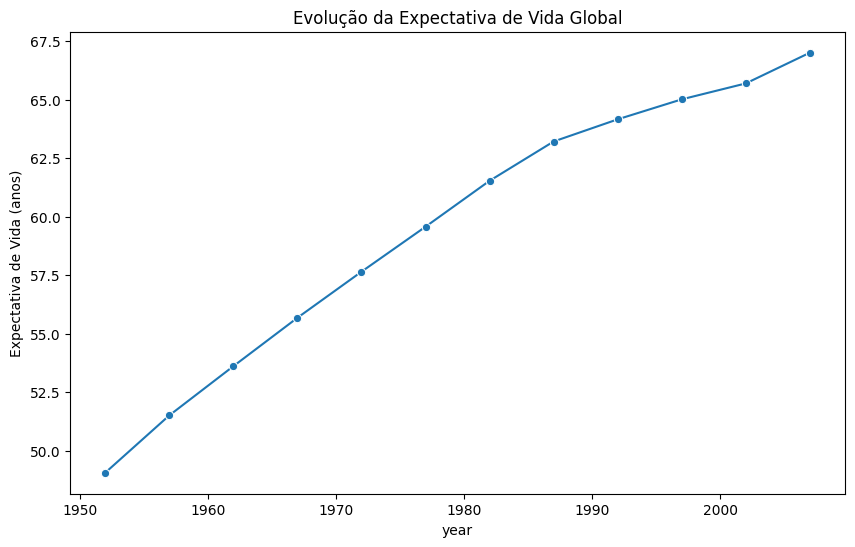

In [57]:
media_ano = df_cm.groupby('year')['lifeExp'].mean().reset_index()
grafico_simples(media_ano, 'year', 'lifeExp', 'Evolução da Expectativa de Vida Global', tipo="linha", label_y='Expectativa de Vida (anos)')

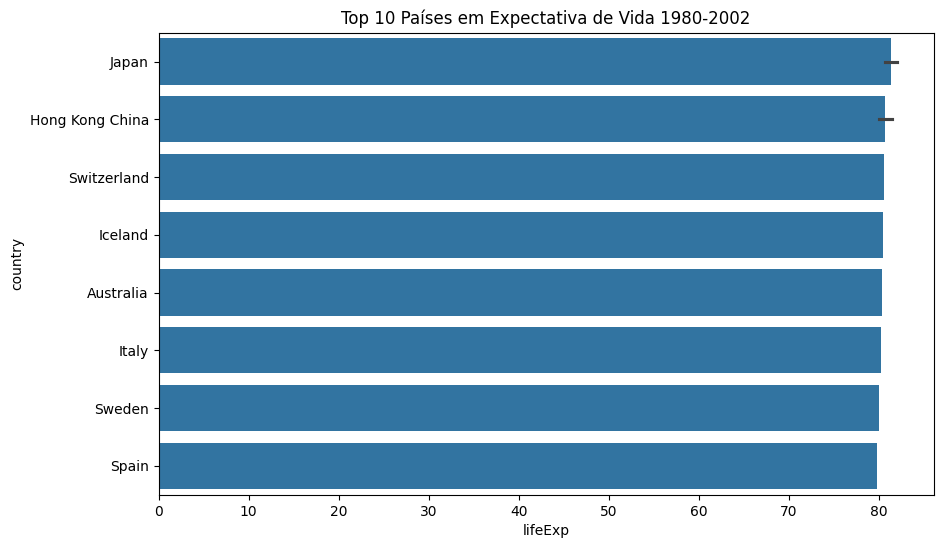

In [58]:
df_ano = filtrar_por_periodo(df_cm, 1980, 2002)
top10 = df_ano.nlargest(10, 'lifeExp')
grafico_simples(top10, 'lifeExp', 'country', 'Top 10 Países em Expectativa de Vida 1980-2002', tipo="barras_h")

,country,year,pop,continent,lifeExp,gdpPercap,gdp_total,gdp_total_bn,pop_mn,code,child_mortality,co2_share,daily_protein_consumption,literacy_rate
6,Argentina,1982,29341374.0,Americas,69.942,8997.897412,2.640107e+11,264.010673,29.341374,ARG,37.7,0.4370,97.49,94.315646
7,Argentina,1987,31620918.0,Americas,70.774,9139.671389,2.890048e+11,289.004800,31.620918,ARG,30.8,0.4503,100.70,95.322619
8,Argentina,1992,33958947.0,Americas,71.868,9308.418710,3.161041e+11,316.104098,33.958947,ARG,25.7,0.4609,97.92,96.234709
9,Argentina,1997,36203463.0,Americas,73.275,10967.281950,3.970536e+11,397.053586,36.203463,ARG,22.0,0.4722,100.98,96.767267
10,Argentina,2002,38331121.0,Americas,74.340,8797.640716,3.372234e+11,337.223431,38.331121,ARG,19.2,0.4817,90.42,97.257984
6,Brazil,1982,128962939.0,Americas,63.336,7030.835878,9.067173e+11,906.717258,128.962939,BRA,87.0,0.4846,63.40,75.764846
7,Brazil,1987,142938076.0,Americas,65.205,7807.095818,1.115931e+12,1115.931255,142.938076,BRA,69.6,0.5439,65.42,78.710134
8,Brazil,1992,155975974.0,Americas,67.057,6950.283021,1.084077e+12,1084.077164,155.975974,BRA,56.1,0.5982,68.30,81.655422
9,Brazil,1997,168546719.0,Americas,69.388,7957.980824,1.341292e+12,1341.291558,168.546719,BRA,41.0,0.6618,76.69,84.600709
10,Brazil,2002,179914212.0,Americas,71.006,8131.212843,1.462921e+12,1462.920751,179.914212,BRA,28.4,0.7350,81.33,87.492062


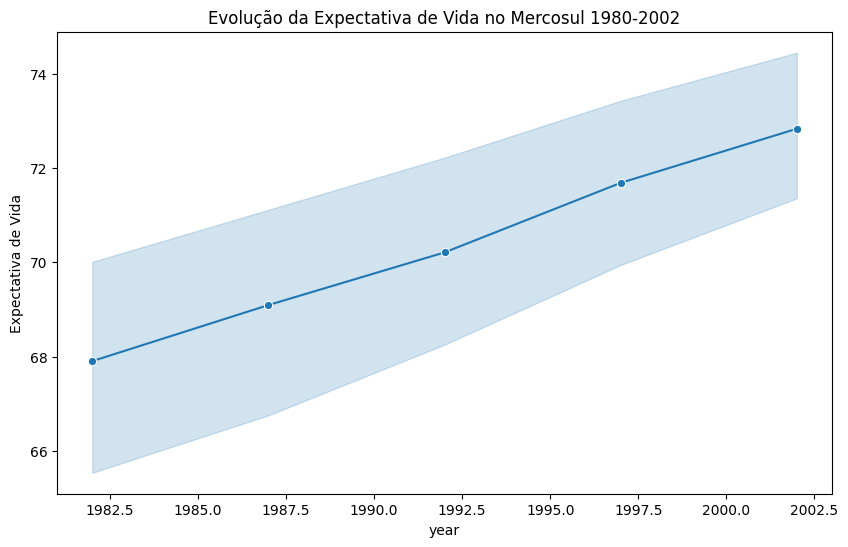

In [59]:
df_82_02 = filtrar_por_periodo(df_cm, 1980, 2002)
paises_mercosul = ['Argentina', 'Brazil', 'Paraguay', 'Uruguay', 'Venezuela']
df_mercosul_82_02 = filtrar_por_paises(df_82_02, paises_mercosul)

display(df_mercosul_82_02)
grafico_simples(df_mercosul_82_02, 'year', 'lifeExp', 'Evolução da Expectativa de Vida no Mercosul 1980-2002', tipo="linha", label_y='Expectativa de Vida')

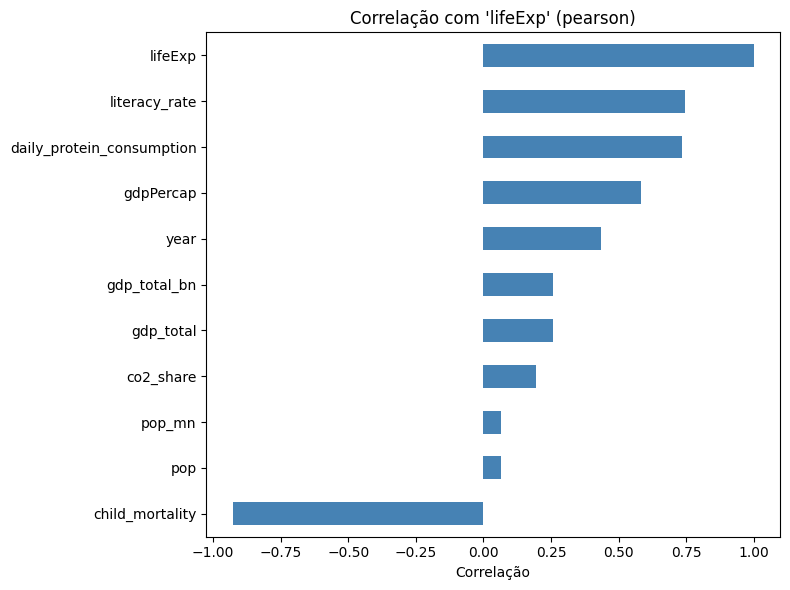

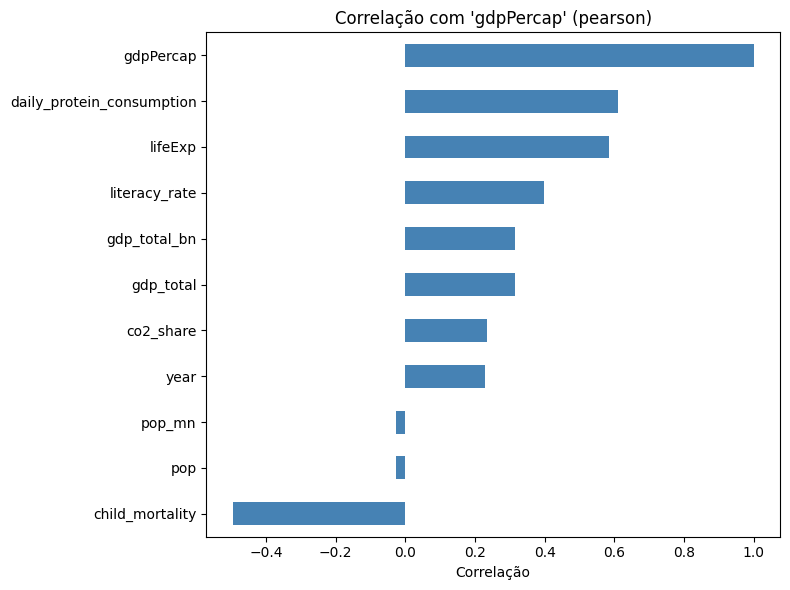

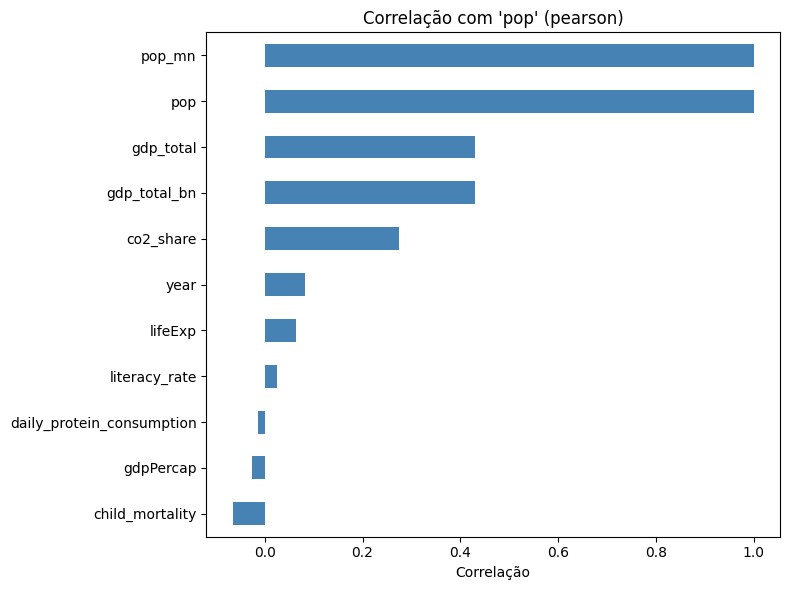

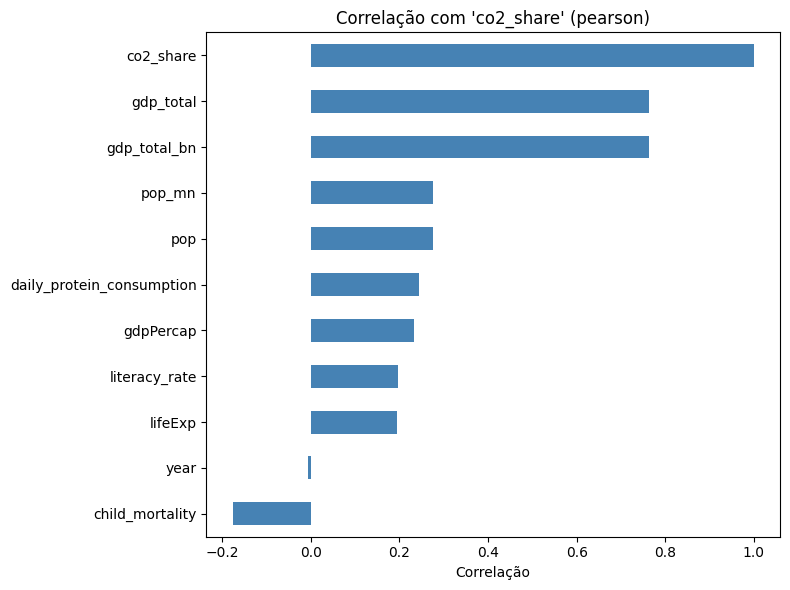

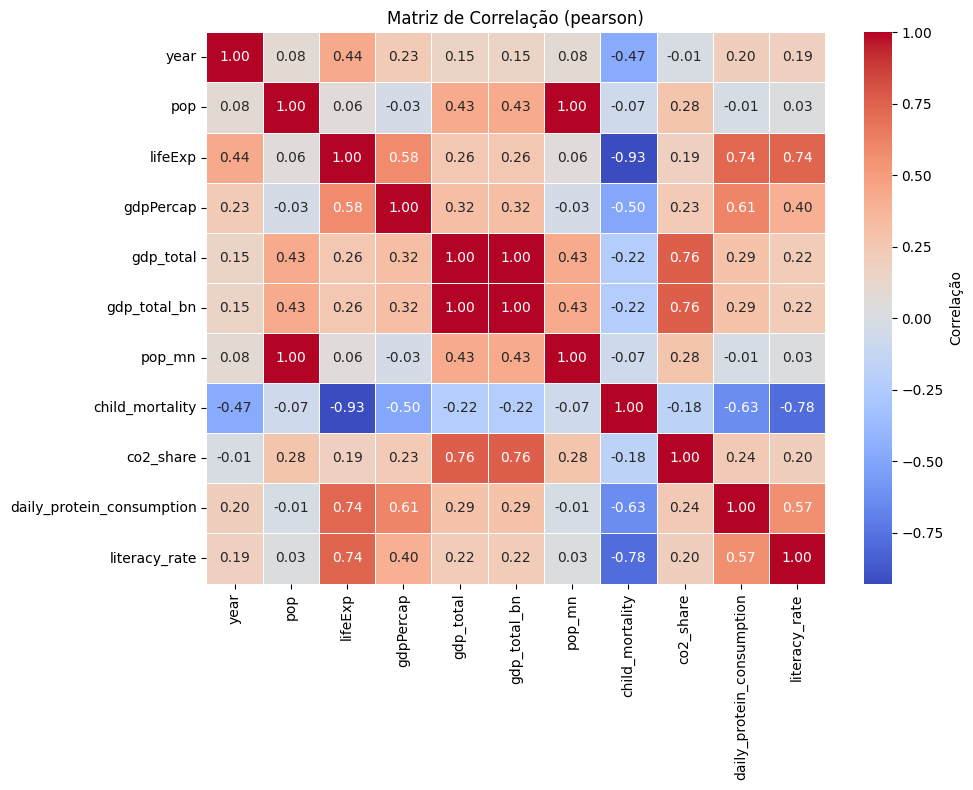

In [60]:
grafico_correlacao(df_cm, alvo="lifeExp")
grafico_correlacao(df_cm, alvo="gdpPercap")
grafico_correlacao(df_cm, alvo="pop")
grafico_correlacao(df_cm, alvo="co2_share")
grafico_correlacao(df_cm)

A Matriz de correlacao acima e os graficos em barra de correlacao serviram como guia para quais pares de parametros que serao usados para gera novos insights

In [61]:
paises_uniao_europeia = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic',
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
    'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
    'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
    'Spain', 'Sweden'
]

df_uniao_europeia_82_02 = filtrar_por_paises(df_82_02, paises_uniao_europeia)


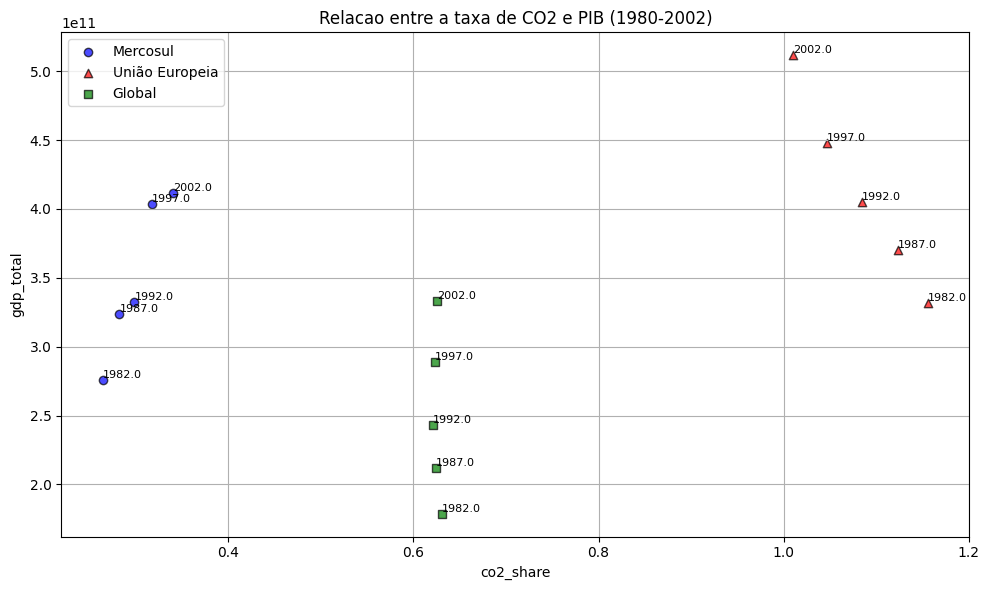

In [62]:
# Calcula a média anual de taxa de alfabetização e expectativa de vida
# para os países da União Europeia no período 1980–2002.
media_per_CO2_ue = (
    df_uniao_europeia_82_02
    .groupby('year')[['co2_share', 'gdp_total']]
    .mean()
    .reset_index()
)

# Calcula a média anual de taxa de alfabetização e expectativa de vida
# para os países do Mercosul no mesmo período.
media_per_CO2_mercosul = (
    df_mercosul_82_02
    .groupby('year')[['co2_share', 'gdp_total']]
    .mean()
    .reset_index()
)

# Calcula a média anual global (todos os países disponíveis no dataset)
# para as mesmas variáveis e período.
media_per_CO2_global = (
    df_82_02
    .groupby('year')[['co2_share', 'gdp_total']]
    .mean()
    .reset_index()
)

regioes =  [
        {
            "df": media_per_CO2_mercosul,   # Dados do Mercosul
            "nome": "Mercosul",                   # Nome na legenda
            "cor": "blue",                        # Cor dos pontos
            "marker": "o"                         # Formato do marcador
        },
        {
            "df": media_per_CO2_ue,         # Dados da União Europeia
            "nome": "União Europeia",
            "cor": "red",
            "marker": "^"
        },
        {
            "df": media_per_CO2_global,     # Dados globais
            "nome": "Global",
            "cor": "green",
            "marker": "s"
        }
    ]
# --------------------------------------------------------------
# Gráfico de dispersão com N regiões (Mercosul, UE e Global)
# --------------------------------------------------------------

grafico_dispersao_n_regioes(
    regioes,
    x="co2_share",                            # Eixo X: taxa de alfabetização média
    y="gdp_total",                                  # Eixo Y: expectativa de vida média
    titulo="Relacao entre a taxa de CO2 e PIB (1980-2002)",
    mostrar_ano= True
)

No grafico acima conseguimos ver que os paises do mercosul aumentaram o deu PIB junto com a sua percentagem de CO2, a tendencia global é mais estavel mas ainda diminui com o passar dos anos , já a tendencia da uniao europeia é cada vez mais que cresce o pib diminui o seu gasto de CO2, podemos atribuir isso a tratados de reducao de emissao e tambem ao fato de produtos terem maior agregado em paises desenvolvidos e serem criados em menor quantidade

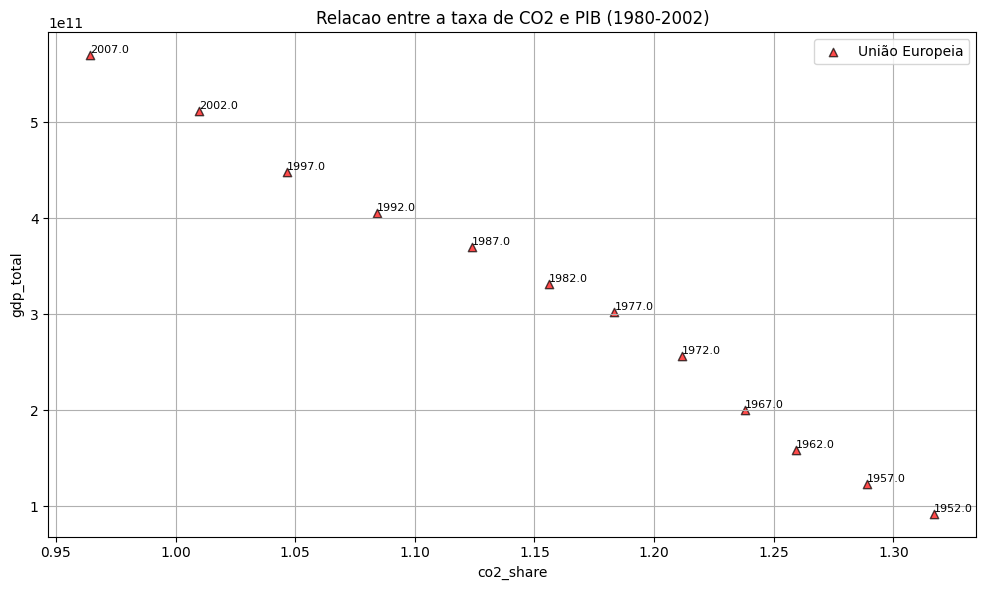

In [67]:
df_uniao_europeia = filtrar_por_paises(df_cm, paises_uniao_europeia)
# Calcula a média anual de taxa de percentagem de CO2 e PIB total
# para os países da União Europeia no período completo.
media_per_CO2_ue = (
    df_uniao_europeia
    .groupby('year')[['co2_share', 'gdp_total']]
    .mean()
    .reset_index()
)


uniao_europeia =  [
        
        {
            "df": media_per_CO2_ue,         # Dados da União Europeia
            "nome": "União Europeia",
            "cor": "red",
            "marker": "^"
        }
    ]
# --------------------------------------------------------------
# Gráfico de dispersão com N regiões (Mercosul, UE e Global)
# --------------------------------------------------------------

grafico_dispersao_n_regioes(
    uniao_europeia,
    x="co2_share",                            # Eixo X: taxa de alfabetização média
    y="gdp_total",                                  # Eixo Y: expectativa de vida média
    titulo="Relacao entre a taxa de CO2 e PIB (1980-2002)",
    mostrar_ano= True
)

olhando somente a media dos paises da UE nos vemos que ao longo do tempo da uniao europeia vai diminuindo sua parte das emissoes cumulativas de CO2 mas uma analise inidividual de cada pais tem de ser feita para que fique claro essa diminuicao

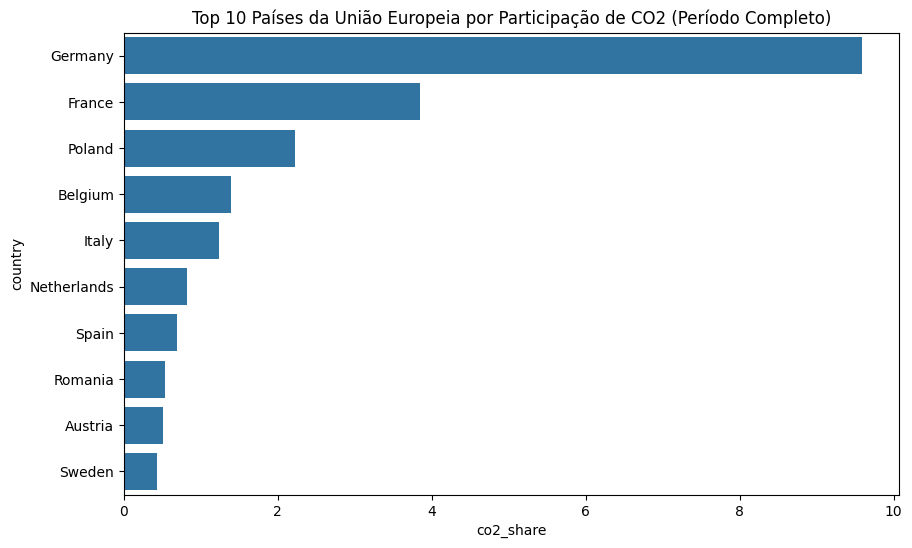

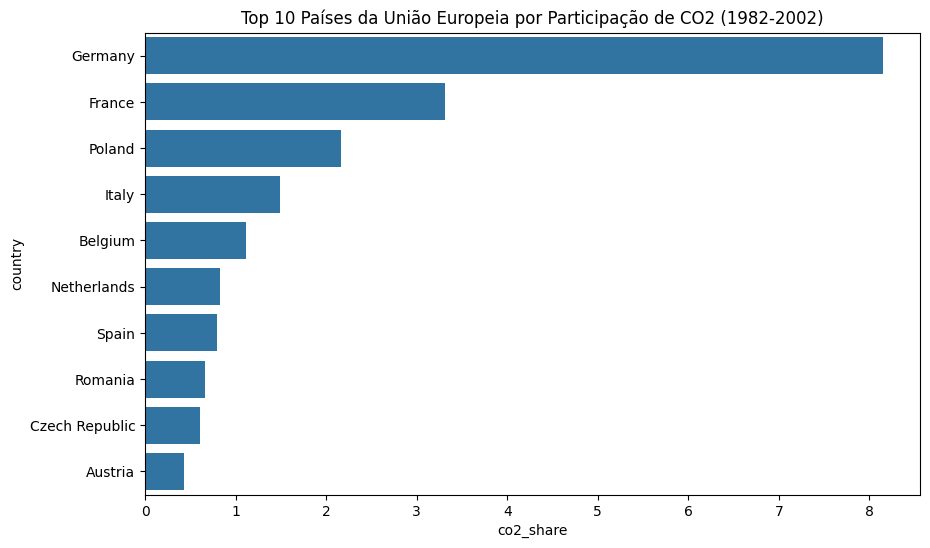

In [68]:
# Top 10 países da União Europeia por participação de CO2 (período completo)
top10_co2_ue_completo = (
    df_uniao_europeia
    .groupby('country')['co2_share']
    .mean()
    .reset_index()
    .sort_values('co2_share', ascending=False)
    .head(10)
)

grafico_simples(
    top10_co2_ue_completo, 
    'co2_share', 
    'country', 
    'Top 10 Países da União Europeia por Participação de CO2 (Período Completo)', 
    tipo="barras_h"
)

# Top 10 países da União Europeia por participação de CO2 (1982-2002)
top10_co2_ue_82_02 = (
    df_uniao_europeia_82_02
    .groupby('country')['co2_share']
    .mean()
    .reset_index()
    .sort_values('co2_share', ascending=False)
    .head(10)
)

grafico_simples(
    top10_co2_ue_82_02, 
    'co2_share', 
    'country', 
    'Top 10 Países da União Europeia por Participação de CO2 (1982-2002)', 
    tipo="barras_h"
)

QUando analisamos o periodo completo ou apenas ks 20 anos dentro do intervalo de 82 ate 2002 temos listas diferentes de paises com maior numero de emissao apesar de alguns paises aparecem em amabas as listas e nas mesmsa posicoes como alemanha,franca e polonia, temos alguns paises que trocam de posicao ao como belgica e italia e outro que estao em uma lista e nao na outra como a republica checa ou a romenia.

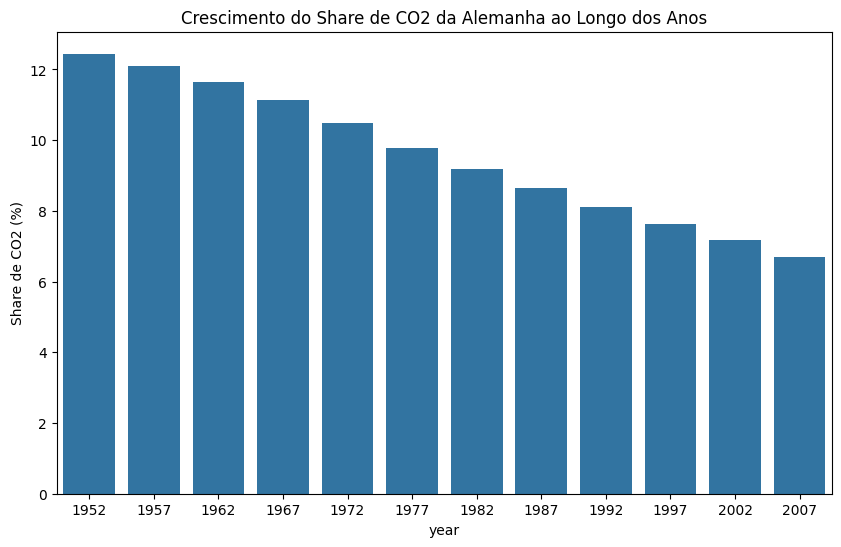

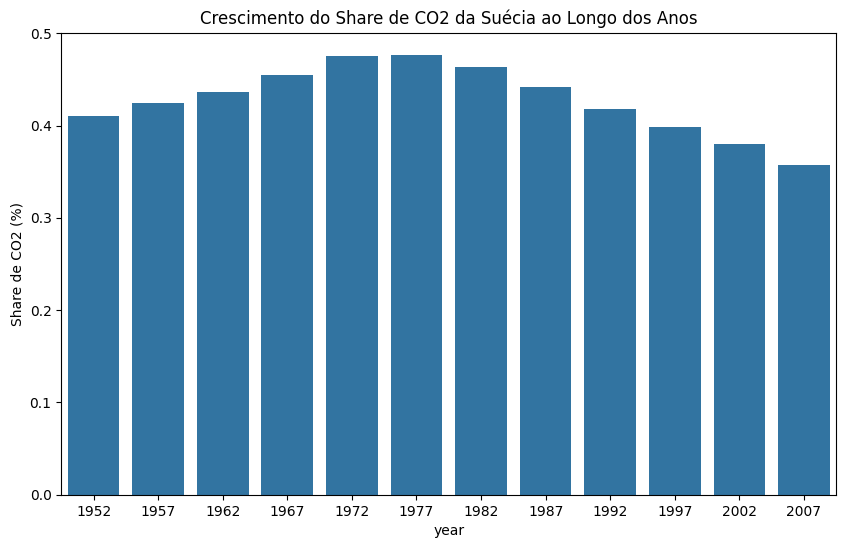

In [71]:
df_germany = filtrar_por_paises(df_cm, ['Germany'])
grafico_simples(df_germany, 'year', 'co2_share', 'Crescimento do Share de CO2 da Alemanha ao Longo dos Anos', tipo="barras", label_y='Share de CO2 (%)')
df_sweden = filtrar_por_paises(df_cm, ['Sweden'])
grafico_simples(df_sweden, 'year', 'co2_share', 'Crescimento do Share de CO2 da Suécia ao Longo dos Anos', tipo="barras", label_y='Share de CO2 (%)')

A participação percentual do país com o menor volume de emissões dentro do top 10 esteve sempre abaixo de 0,5%. Entre 1952 e 1982, observa-se um aumento gradual, provavelmente impulsionado por um boom industrial. Com o crescimento estabilizado e o avanço da responsabilidade climática entre os países europeus, a Suécia passa a reduzir sua participação relativa nas emissões globais.
Já a Alemanha, líder em emissões dentro da União Europeia, apresenta uma trajetória de declínio contínuo. Isso se deve, em parte, ao seu papel histórico em dois grandes conflitos mundiais, que impulsionaram fortemente sua indústria — o que, por ser um indicador cumulativo, torna difícil desvincular o país de uma alta participação histórica.
É importante destacar que, por se tratar de uma porcentagem, a queda no share da Alemanha ou da Suécia não significa necessariamente que esses países passaram a emitir menos CO₂ ao longo do tempo. Na verdade, o que ocorre é que outros países — especialmente emergentes — aumentaram significativamente seus níveis de emissão, alterando a distribuição global.
Ainda assim, a Alemanha adotou medidas concretas para reduzir suas emissões absolutas, como a transição para fontes de energia mais limpas e o aumento da eficiência em seus processos produtivos. Esses esforços contribuíram para a queda relativa de sua participação, mesmo diante de um cenário global de crescimento acelerado nas emissões.

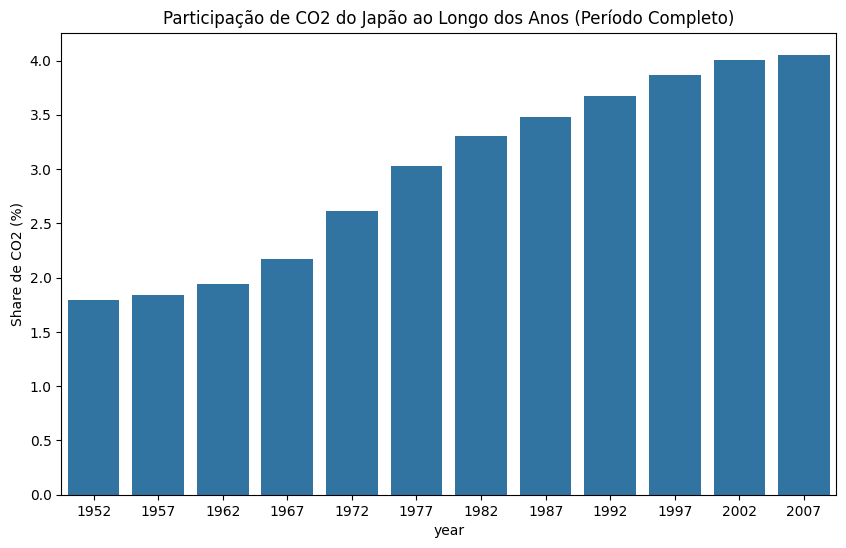

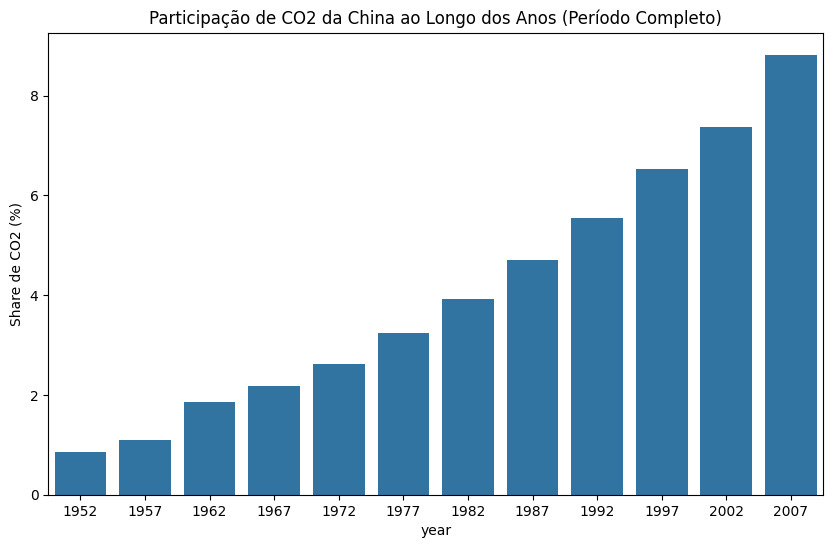

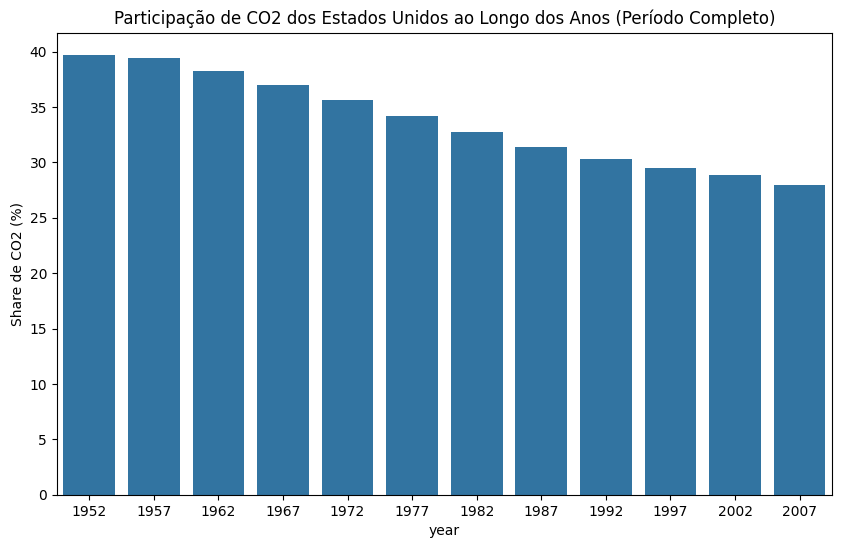

In [73]:
# Filtrar dados para Japão, China e Estados Unidos
df_japan = filtrar_por_paises(df_cm, ['Japan'])
df_china = filtrar_por_paises(df_cm, ['China'])
df_usa = filtrar_por_paises(df_cm, ['United States'])

# Gráfico para Japão - período completo
grafico_simples(df_japan, 'year', 'co2_share', 'Participação de CO2 do Japão ao Longo dos Anos (Período Completo)', tipo="barras", label_y='Share de CO2 (%)')

# Gráfico para China - período completo
grafico_simples(df_china, 'year', 'co2_share', 'Participação de CO2 da China ao Longo dos Anos (Período Completo)', tipo="barras", label_y='Share de CO2 (%)')

# Gráfico para Estados Unidos - período completo
grafico_simples(df_usa, 'year', 'co2_share', 'Participação de CO2 dos Estados Unidos ao Longo dos Anos (Período Completo)', tipo="barras", label_y='Share de CO2 (%)')



Um dos fatores que explicam a queda da participação relativa da União Europeia nas emissões globais é o simples fato de que outros países passaram a emitir muito mais ao longo das últimas décadas. A China é o exemplo mais evidente: seu processo de industrialização acelerada elevou drasticamente suas emissões, ampliando seu peso no total global. Além dela, países como Estados Unidos e Japão — ambos fortemente industrializados e participantes das grandes guerras — também influenciam essa redistribuição.
O Japão, impulsionado por um rápido avanço econômico no pós-guerra, praticamente dobrou sua participação histórica nas emissões, sem apresentar quedas significativas ao longo do período analisado. Já os Estados Unidos, que lideraram as emissões globais por décadas, viram sua participação relativa diminuir à medida que outros países cresceram. Essa liderança inicial se explica pelo uso predominante de fontes de energia não renováveis, como carvão e gás, aliado a um padrão de consumo historicamente elevado.

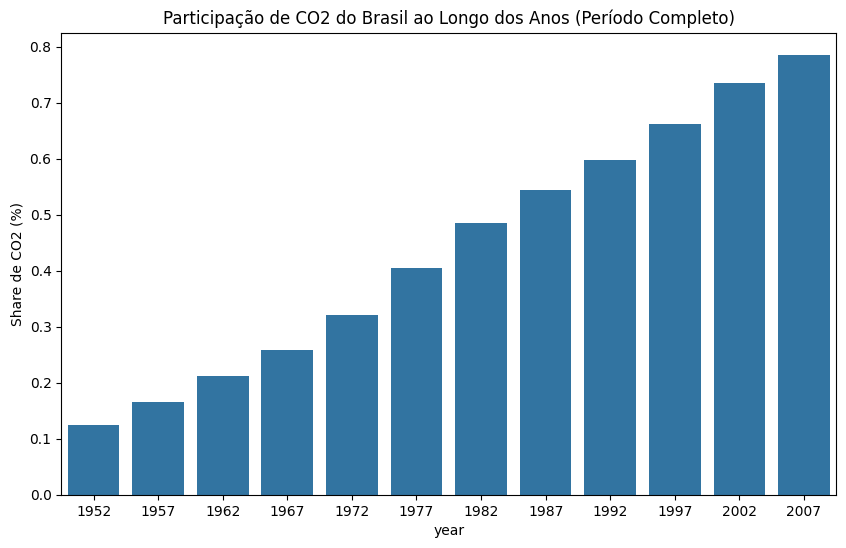

In [76]:
df_brazil = filtrar_por_paises(df_cm, ['Brazil'])
grafico_simples(df_brazil, 'year', 'co2_share', 'Participação de CO2 do Brasil ao Longo dos Anos (Período Completo)', tipo="barras", label_y='Share de CO2 (%)')

Ao analisarmos países emergentes como o Brasil, observamos que o consumo de CO₂ está em constante crescimento, impulsionado principalmente pela industrialização e pelo aumento populacional. No entanto, esse crescimento não se traduz em uma participação significativa no cenário global, em grande parte porque a matriz energética brasileira é uma das mais limpas do mundo — com forte presença de fontes renováveis como hidrelétricas e biocombustíveis.

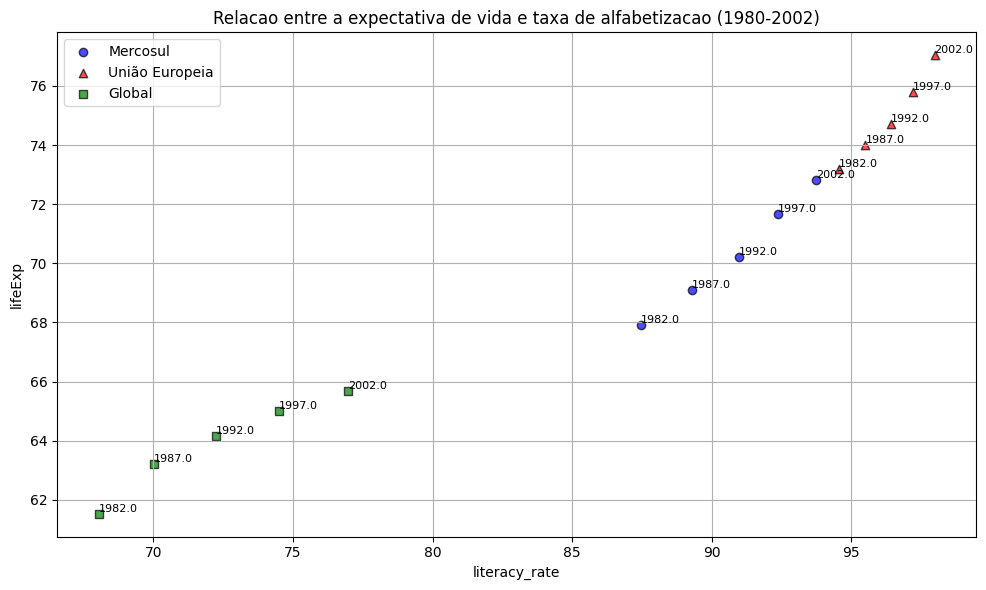

In [64]:
# Calcula a média anual de taxa de alfabetização e expectativa de vida
# para os países da União Europeia no período 1980–2002.
media_alfabetizacao_ue = (
    df_uniao_europeia_82_02
    .groupby('year')[['literacy_rate', 'lifeExp']]
    .mean()
    .reset_index()
)

# Calcula a média anual de taxa de alfabetização e expectativa de vida
# para os países do Mercosul no mesmo período.
media_alfabetizacao_mercosul = (
    df_mercosul_82_02
    .groupby('year')[['literacy_rate', 'lifeExp']]
    .mean()
    .reset_index()
)

# Calcula a média anual global (todos os países disponíveis no dataset)
# para as mesmas variáveis e período.
media_alfabetizacao_global = (
    df_82_02
    .groupby('year')[['literacy_rate', 'lifeExp']]
    .mean()
    .reset_index()
)

regioes =  [
        {
            "df": media_alfabetizacao_mercosul,   # Dados do Mercosul
            "nome": "Mercosul",                   # Nome na legenda
            "cor": "blue",                        # Cor dos pontos
            "marker": "o"                         # Formato do marcador
        },
        {
            "df": media_alfabetizacao_ue,         # Dados da União Europeia
            "nome": "União Europeia",
            "cor": "red",
            "marker": "^"
        },
        {
            "df": media_alfabetizacao_global,     # Dados globais
            "nome": "Global",
            "cor": "green",
            "marker": "s"
        }
    ]

grafico_dispersao_n_regioes(
    regioes,
    x="literacy_rate",                            # Eixo X: taxa de alfabetização média
    y="lifeExp",                                  # Eixo Y: expectativa de vida média
    titulo="Relacao entre a expectativa de vida e taxa de alfabetizacao (1980-2002)",
    mostrar_ano= True
)

O gráfico revela uma correlação positiva clara entre taxa de alfabetização e expectativa de vida: regiões com maior nível educacional tendem a apresentar maior longevidade. A União Europeia lidera em ambos os indicadores, mantendo padrões elevados e estáveis ao longo do tempo. O Mercosul mostra uma trajetória de crescimento, com avanços visíveis, embora ainda distante dos níveis europeus. Já a média global ocupa uma faixa intermediária, refletindo a diversidade de contextos entre países desenvolvidos e em desenvolvimento. Esses dados reforçam a importância da educação como fator determinante para a saúde e o bem-estar populacional.

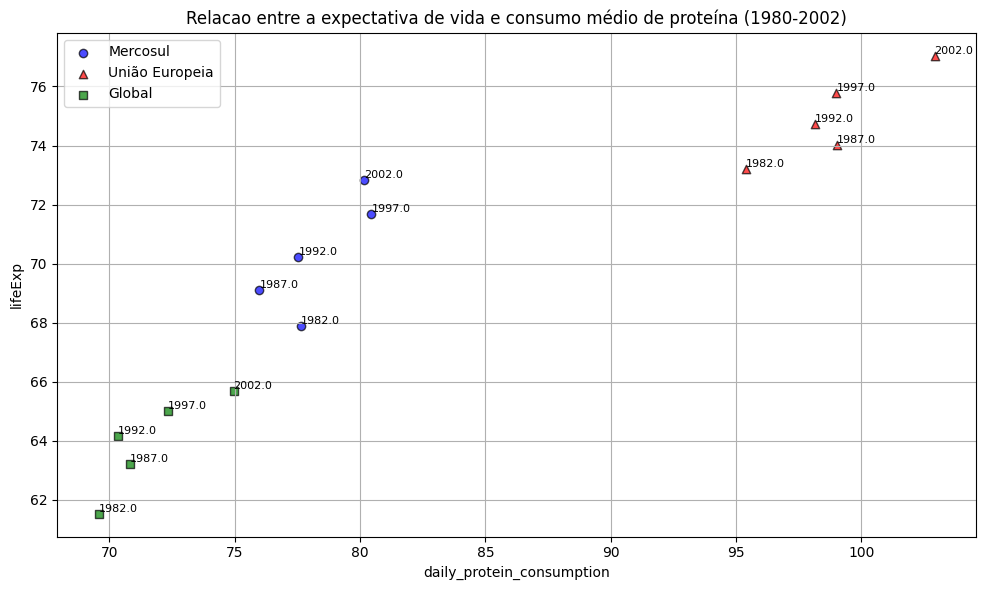

In [65]:
# Calcula a média anual de taxa de alfabetização e expectativa de vida
# para os países da União Europeia no período 1980–2002.
media_alfabetizacao_ue = (
    df_uniao_europeia_82_02
    .groupby('year')[['daily_protein_consumption', 'lifeExp']]
    .mean()
    .reset_index()
)

# Calcula a média anual de taxa de alfabetização e expectativa de vida
# para os países do Mercosul no mesmo período.
media_alfabetizacao_mercosul = (
    df_mercosul_82_02
    .groupby('year')[['daily_protein_consumption', 'lifeExp']]
    .mean()
    .reset_index()
)

# Calcula a média anual global (todos os países disponíveis no dataset)
# para as mesmas variáveis e período.
media_alfabetizacao_global = (
    df_82_02
    .groupby('year')[['daily_protein_consumption', 'lifeExp']]
    .mean()
    .reset_index()
)

regioes =  [
        {
            "df": media_alfabetizacao_mercosul,   # Dados do Mercosul
            "nome": "Mercosul",                   # Nome na legenda
            "cor": "blue",                        # Cor dos pontos
            "marker": "o"                         # Formato do marcador
        },
        {
            "df": media_alfabetizacao_ue,         # Dados da União Europeia
            "nome": "União Europeia",
            "cor": "red",
            "marker": "^"
        },
        {
            "df": media_alfabetizacao_global,     # Dados globais
            "nome": "Global",
            "cor": "green",
            "marker": "s"
        }
    ]

grafico_dispersao_n_regioes(
    regioes,
    x="daily_protein_consumption",                            # Eixo X: consumo médio de proteína diária
    y="lifeExp",                                  # Eixo Y: expectativa de vida média
    titulo="Relacao entre a expectativa de vida e consumo médio de proteína (1980-2002)",
    mostrar_ano= True
)

O gráfico revela uma correlação positiva entre o consumo médio diário de proteína e a expectativa de vida: regiões com maior ingestão proteica tendem a apresentar maior longevidade. A União Europeia se destaca com os maiores valores em ambos os indicadores, refletindo padrões alimentares mais equilibrados e sistemas de saúde consolidados. O Mercosul mostra uma trajetória de crescimento, com avanços visíveis no consumo e na expectativa de vida, embora ainda abaixo dos níveis europeus. Já a média global ocupa uma faixa intermediária, evidenciando disparidades nutricionais e estruturais entre diferentes países. Esses dados reforçam a importância da alimentação adequada como fator determinante para a saúde populacional.